In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import os
#waveform-database:A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb 

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.rc("xtick",labelsize=12)
mlp.rc("ytick",labelsize=12)
mlp.rc("axes",labelsize=14)

MAIN_PATH = "/home/anisha/Documents/MajorProject"
DATA_PATH = "/home/anisha/Documents/MajorProject/mit-database"
FIG_PATH="/home/anisha/Desktop/ECG-Heart-mate"
FIGURE_PATH = os.path.join(FIG_PATH,"figures_2")
os.makedirs("figures_2",exist_ok=True)
os.chdir(DATA_PATH)

In [2]:
sample = wfdb.io.rdsamp("101")

In [3]:
print(sample)

(array([[-0.345, -0.16 ],
       [-0.345, -0.16 ],
       [-0.345, -0.16 ],
       ...,
       [-0.295, -0.11 ],
       [-0.29 , -0.11 ],
       [ 0.   ,  0.   ]]), {'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V1'], 'comments': ['75 F 1011 654 x1', 'Diapres']})


In [4]:
sample_file=sample[0]
print(sample_file.shape)
print(type(sample_file))
print(sample_file)

(650000, 2)
<class 'numpy.ndarray'>
[[-0.345 -0.16 ]
 [-0.345 -0.16 ]
 [-0.345 -0.16 ]
 ...
 [-0.295 -0.11 ]
 [-0.29  -0.11 ]
 [ 0.     0.   ]]


In [5]:
sample_MLII = sample_file[:,0]
sample_V5 = sample_file[:,1]
annotation_101_MLII=wfdb.rdann("101", 'atr')

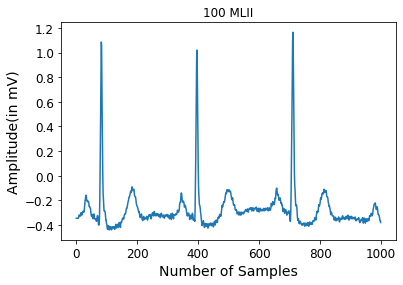

In [6]:
plt.plot(sample_MLII[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 MLII")
#abc = os.path.join(FIGURE_PATH,"101-MLII")
#plt.savefig("abc",dpi=300, format='png')

plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/101-MLII.png")

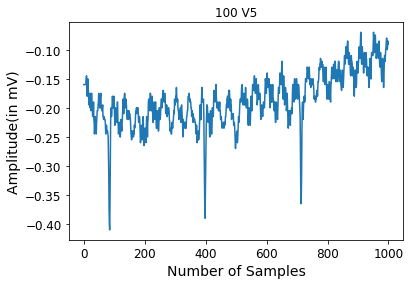

In [7]:
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 V5")
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/101-MLII.png")

In [8]:
records = np.loadtxt(os.path.join(DATA_PATH,"RECORDS"), dtype=str)

In [9]:
print(records)
print(len(records))

['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '124' '200'
 '201' '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215'
 '217' '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']
48


In [10]:
def read_data():
    dataset = []
    for record in records:
        temp = wfdb.rdrecord(record)
        dataset.append(temp.p_signal)
    return dataset

In [11]:
dataset = read_data()

In [12]:
dataset[47]

array([[-0.08 ,  0.135],
       [-0.08 ,  0.135],
       [-0.08 ,  0.135],
       ...,
       [-0.395,  0.075],
       [-0.38 ,  0.08 ],
       [ 0.   ,  0.   ]])

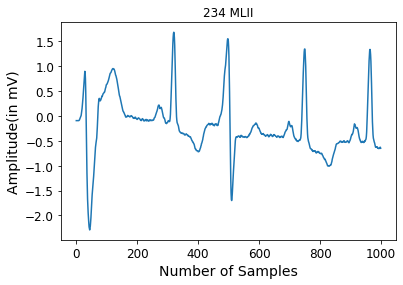

In [13]:
#Plotting the second last record MLII data
plt.plot(dataset[46][:1000,0])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 MLII")
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/235-MLII.png")

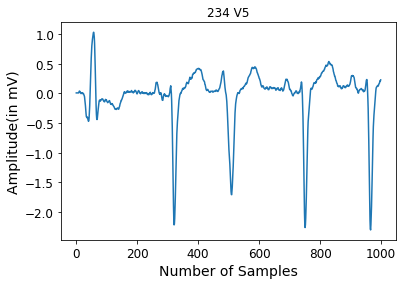

In [14]:
#PLotting the second last record V5 data
plt.plot(dataset[46][:1000,1])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 V5")
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/234-V5.png")

In [15]:
#Showing all the labels present in our data
wfdb.io.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [16]:
invalid_beat = [
    "[", "!", "]", "x", "(", ")", "p", "t", 
    "u", "`", "'", "^", "|", "~", "+", "s", 
    "T", "*", "D", "=",'"', "@", "B", "a", "J", "S",
    "r", "F", "e", "j", "n", "f", "Q", "?"
]

label_beats=[
    "A", "L", "/", "V", "R", "E", "N"
]

In [17]:
def classify(symbol):
    if symbol in label_beats:
        return 1
    else:
        return 0
    
def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    samp=signal_MLII[x:y]
    '''for i in ann_Sample[2,-2]:
            x=ann_Sample[i]-window
            y=ann_sample[i]+window
            samp=temp[x:y]
            
    return samp'''
    return samp

all_signals=[]
all_labels=[]
for record in records:
    temp=wfdb.rdrecord(record)
    annot_temp=wfdb.rdann(record, 'atr')
    ann_sample=annot_temp.sample
    ann_symbol=annot_temp.symbol
    fs=temp.fs
    signal=temp.p_signal
    signal_MLII=signal[:,0]
    for i, i_sample in enumerate(ann_sample):
        label_dec=classify(ann_symbol[i])
        segmentation=segment(signal_MLII, i_sample)
        if label_dec==1 and len(segmentation)==360:
            all_signals.append(segmentation)
            all_labels.append(ann_symbol[i])


In [18]:
# vstack Stacks arrays in sequence vertically (row wise).
all_signals_fin=np.vstack(all_signals)

In [19]:
print(all_signals_fin.shape)

(107141, 360)


N


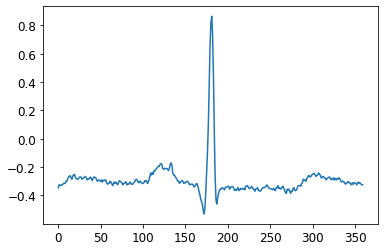

In [20]:
#PLotting
plt.plot(all_signals_fin[10])
print(all_labels[10])

# Resampling

In [21]:
labels_fin=pd.Series(all_labels)

In [22]:
len(all_signals_fin)
labels_array=np.array(all_labels)

In [23]:
df_0=all_signals_fin[labels_fin=='/']
df_1=all_signals_fin[labels_fin=='A']
df_2=all_signals_fin[labels_fin=='E']
df_3=all_signals_fin[labels_fin=='L']
df_4=all_signals_fin[labels_fin=='N']
df_5=all_signals_fin[labels_fin=='R']
df_6=all_signals_fin[labels_fin=='V']
y_df0=labels_array[labels_fin=='/']
print(len(df_0))
print(y_df0)
len(y_df0)

7023
['/' '/' '/' ... '/' '/' '/']


7023

In [24]:
from sklearn.utils import resample

In [25]:
df0_sampled=resample(df_0, replace=True, n_samples=20000, random_state=42)
df1_sampled=resample(df_1, replace=True, n_samples=20000, random_state=42)
df2_sampled=resample(df_2, replace=True, n_samples=20000, random_state=42)
df3_sampled=resample(df_3, replace=True, n_samples=20000, random_state=42)
df4_sampled=resample(df_4, replace=True, n_samples=20000, random_state=42)
df5_sampled=resample(df_5, replace=True, n_samples=20000, random_state=42)
df6_sampled=resample(df_6, replace=True, n_samples=20000, random_state=42)


In [26]:
print(len(df0_sampled))
print(len(df1_sampled))
print(len(df2_sampled))
print(len(df3_sampled))
print(len(df4_sampled))
print(len(df5_sampled))
print(len(df6_sampled))

20000
20000
20000
20000
20000
20000
20000


In [27]:
y_0=['/']*len(df0_sampled)
y_1=['A']*len(df1_sampled)
y_2=['E']*len(df2_sampled)
y_3=['L']*len(df3_sampled)
y_4=['N']*len(df4_sampled)
y_5=['R']*len(df5_sampled)
y_6=['V']*len(df6_sampled)
    

In [28]:
X_final=[]
X_final.extend(df0_sampled)
X_final.extend(df1_sampled)
X_final.extend(df2_sampled)
X_final.extend(df3_sampled)
X_final.extend(df4_sampled)
X_final.extend(df5_sampled)
X_final.extend(df6_sampled)

In [29]:
print(len(X_final))

140000


In [30]:
y_final=[]
y_final.extend(y_0)
y_final.extend(y_1)
y_final.extend(y_2)
y_final.extend(y_3)
y_final.extend(y_4)
y_final.extend(y_5)
y_final.extend(y_6)

In [31]:
len(y_final)

140000

In [32]:
X_final[1]

array([ 0.6  ,  0.59 ,  0.57 ,  0.545,  0.51 ,  0.465,  0.42 ,  0.395,
        0.375,  0.34 ,  0.295,  0.24 ,  0.205,  0.17 ,  0.135,  0.105,
        0.06 ,  0.02 , -0.025, -0.055, -0.08 , -0.115, -0.15 , -0.195,
       -0.21 , -0.235, -0.26 , -0.28 , -0.325, -0.335, -0.35 , -0.38 ,
       -0.375, -0.395, -0.42 , -0.435, -0.445, -0.445, -0.445, -0.47 ,
       -0.47 , -0.475, -0.485, -0.475, -0.48 , -0.49 , -0.51 , -0.505,
       -0.505, -0.515, -0.5  , -0.505, -0.515, -0.515, -0.515, -0.51 ,
       -0.51 , -0.51 , -0.515, -0.525, -0.53 , -0.51 , -0.505, -0.515,
       -0.515, -0.525, -0.525, -0.505, -0.5  , -0.505, -0.5  , -0.515,
       -0.515, -0.49 , -0.49 , -0.475, -0.475, -0.485, -0.49 , -0.48 ,
       -0.48 , -0.46 , -0.465, -0.47 , -0.475, -0.46 , -0.455, -0.45 ,
       -0.47 , -0.465, -0.455, -0.455, -0.45 , -0.45 , -0.45 , -0.46 ,
       -0.465, -0.465, -0.45 , -0.47 , -0.465, -0.47 , -0.455, -0.47 ,
       -0.46 , -0.465, -0.475, -0.47 , -0.48 , -0.46 , -0.47 , -0.47 ,
      

# Standarization


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
scaled=scaler.fit_transform(X_final)

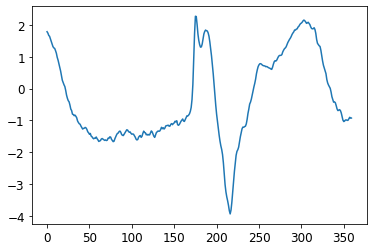

In [35]:
plt.plot(scaled[10])


In [36]:
scaled.shape

(140000, 360)

# Processing data


In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
strad=StratifiedShuffleSplit()

In [38]:
assin_strad=strad.split(scaled, y_final)

In [39]:
train_index, test_index=next(assin_strad)

In [40]:
train_data_scaled=scaled[train_index]


In [41]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [42]:
labels_final=lab.fit_transform(y_final)

In [43]:
lab.classes_

array(['/', 'A', 'E', 'L', 'N', 'R', 'V'], dtype='<U1')

In [44]:
train_label=labels_final[train_index]

In [45]:
train_label.shape

(126000,)

In [46]:
assin_val=strad.split(train_data_scaled, train_label)

In [47]:
train_index_fin, val_index=next(assin_val)

In [48]:
val_index.shape

(12600,)

In [49]:
train_index_fin.shape

(113400,)

In [50]:
test_index.shape

(14000,)

In [51]:
X_val=train_data_scaled[val_index]

In [52]:
X_val.shape

(12600, 360)

In [53]:
train_data_scaled_fin=train_data_scaled[train_index_fin]

In [54]:
train_data_scaled_fin.shape

(113400, 360)

In [55]:
train_labels_fin=train_label[train_index_fin]

In [56]:
y_val=train_label[val_index]

In [57]:
test_data_scaled=scaled[test_index]

In [58]:
test_labels=labels_final[test_index]

# Saving Trained models

In [59]:
import os
MODEL_PATH = os.path.join(FIG_PATH,"saved_models")
os.makedirs("saved_models",exist_ok=True)

import pickle

# a function to save trained models in pickle object
def save_model(name,model,extension=".pickle"):
    path = os.path.join(MODEL_PATH,name+extension)
    print("Saving Model : ",name)
    file = open(path,"wb")
    pickle.dump(model,file)
    file.close()

In [60]:
#save_model("KNN_CLASSIFIER",knn)
#save_model("LOGISTIC_CLASSIFIER",log)
#save_model("SVM_CLASSIFIER", Cls)

# CNN

In [61]:
from tensorflow import keras
CNN_X_train=train_data_scaled_fin.reshape(len(train_data_scaled_fin), len(train_data_scaled_fin[0]), 1)
CNN_val=X_val.reshape(len(X_val), len(X_val[0]), 1)


In [62]:
train_labels_fin.shape

(113400,)

In [63]:

#def CNN_Classifier(X_train, y_train, X_test, y_test):
    

CNN_model = keras.Sequential()
CNN_model.add(keras.layers.Conv1D(64,kernel_size=3,input_shape=(360,1),activation="relu"))
CNN_model.add(keras.layers.MaxPool1D(pool_size=2))
CNN_model.add(keras.layers.Conv1D(filters=32,kernel_size=3,activation="relu"))
CNN_model.add(keras.layers.MaxPool1D(pool_size=2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(100,activation="relu"))
CNN_model.add(keras.layers.Dense(7,activation="softmax"))
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False)
opt=keras.optimizers.Adam(lr=0.0001)
CNN_model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
CNN_model.summary()
    #X_train=X_train.reshape(len(X_train), len(X_train[0]), 1)
    #X_test=X_test.reshape(len(X_test), len(X_test[0]), 1)
history=CNN_model.fit(CNN_X_train, train_labels_fin, epochs=25, batch_size=50, validation_data=(CNN_val, y_val))
    #max_val_acc=max(history.history['accuracy'])
    
    #return CNN_model.evaluate(X_test, y_test)[1]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 358, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 179, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 177, 32)           6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 88, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2816)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               281700    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7

def K_fold_CV(X_new,Y_new,K=10):
    kfold = StratifiedKFold(n_splits=K,random_state=42)
    acc = []
    for train_id,test_id in kfold.split(X_new,Y_new):
        acc.append(CNN_Classifier(np.array(X_new[train_id]),np.array(Y_new[train_id]),np.array(X_new[test_id]),np.array(Y_new[test_id])))
    return np.array(acc)


In [64]:
len(labels_final)

140000

acc=K_fold_CV(scaled, labels_final)
print(acc)

In [65]:
cnn_prediction = CNN_model.predict_classes(CNN_X_train)

In [66]:
CNN_X_train[1]

array([[-0.45296711],
       [-0.46553855],
       [-0.46813909],
       [-0.44024799],
       [-0.41165825],
       [-0.40306461],
       [-0.38352661],
       [-0.37390139],
       [-0.3637289 ],
       [-0.37441386],
       [-0.36391469],
       [-0.38708495],
       [-0.38858191],
       [-0.38978863],
       [-0.37954228],
       [-0.36894467],
       [-0.33426762],
       [-0.33581213],
       [-0.30113013],
       [-0.2763261 ],
       [-0.28739301],
       [-0.29803691],
       [-0.29582689],
       [-0.29379484],
       [-0.33002779],
       [-0.31511802],
       [-0.30025331],
       [-0.31035083],
       [-0.29407801],
       [-0.31684731],
       [-0.30078529],
       [-0.24665204],
       [-0.24369984],
       [-0.2795671 ],
       [-0.28879415],
       [-0.31102739],
       [-0.30653542],
       [-0.3027008 ],
       [-0.29875691],
       [-0.30906531],
       [-0.29219468],
       [-0.32783666],
       [-0.28273174],
       [-0.26380525],
       [-0.27134459],
       [-0

In [67]:
print(cnn_prediction[0:10])

[6 4 3 1 0 4 1 0 5 2]


In [68]:
print(train_label[0:10])

[3 4 4 5 3 0 6 1 0 1]


In [ ]:
figure=plt.figure()
axes=figure.add_subplot(111)
caxes=axes.matshow(cnn_conf_matrix, interpolation='nearest')
figure.colorbar(caxes)
plt.show()

In [ ]:
CNN_X_test=test_data_scaled.reshape(len(test_data_scaled), len(test_data_scaled[0]),1)

In [ ]:
test_loss, test_accuracy = CNN_model.evaluate(CNN_X_test, test_labels)

# Saving the model 

In [70]:
import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(CNN_model, f)

TypeError: can't pickle _thread.RLock objects

In [75]:
CNN_model.save('home/anisha/Desktop/ECG')

INFO:tensorflow:Assets written to: home/anisha/Desktop/ECG/assets


In [73]:
from sklearn.externals import joblib

/home/anisha/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [74]:
joblib.dump(CNN_model, 'model_joblib')

TypeError: can't pickle _thread.RLock objects

# Predicting raw data

In [ ]:
import pandas as pd
data=pd.read_csv("/home/anisha/Desktop/ECG-Heart-mate/SampleECG_converted.csv", delimiter='\t')

In [ ]:
data_raw=data.iloc[:,2]

In [ ]:
from biosppy.signals import ecg
import biosppy

In [ ]:
out = ecg.ecg(signal=data_raw, show=True, sampling_rate=1000)

In [ ]:
r_peak=biosppy.signals.ecg.christov_segmenter(signal=data_raw, sampling_rate=1000)[0]
r_list=r_peak

In [ ]:
r_new=r_list[0:1]

In [ ]:
import numpy as np
data_fin = np.array(data_raw)
signals = []
count = 1
peaks =  biosppy.signals.ecg.christov_segmenter(signal=data_fin, sampling_rate = 1000)[0]
print(peaks)
def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    print(x, y)
    samp=signal_MLII[x:y]
    '''for i in ann_Sample[2,-2]:
            x=ann_Sample[i]-window
            y=ann_sample[i]+window
            samp=temp[x:y]
            
    return samp'''
    return samp
for i in peaks:
    segmentation=segment(data_fin, i)
    if len(segmentation)==360:
        signals.append(segmentation)


In [ ]:
sig=signals[462]

In [ ]:
plt.plot(sig)

In [ ]:
raw_sig=np.vstack(signals)

In [ ]:
scaled_raw=scaler.fit_transform(raw_sig)

In [ ]:
scaled_raw.shape


In [ ]:
test_raw_data = scaled_raw.reshape(463,360,1)
test_no_scaled=raw_sig.reshape(463, 360, 1)

In [ ]:
predict_this=CNN_model.predict_classes(test_raw_data)
predict_this_no=CNN_model.predict_classes(test_no_scaled)

In [ ]:
predict_this_no[0:453]

In [ ]:
with open('model_pickle', 'rb') as f:
    mp=pickle.load(f)

In [ ]:
predict_saved=mp.predict_classes(test_no_scaled)

In [ ]:
predict_saved[0:453]

In [ ]:
CNN_X_train.shape

In [ ]:
plt.plot(signals[1])

In [ ]:
print(history.history.keys())

In [ ]:
history2=CNN_model.evaluate(CNN_X_test, test_labels)

In [ ]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(0, 25)
plt.plot(epochs, loss_train, 'g', label='Train loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/train_val_loss.png")
plt.show()

In [ ]:
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(0, 25)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/train_val_acc.png")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
predVali=CNN_model.predict_classes(CNN_val)
predTest=CNN_model.predict_classes(CNN_X_test)
print('validation report :', '\n', classification_report(y_val, predVali))
print('validation accuracy:', '\n', accuracy_score(y_val, predVali))
print('Test report :', '\n', classification_report(test_labels, predTest))
print('Test accuracy:', '\n', accuracy_score(test_labels, predTest))